## Задача 1
###  Условие задачи

В цехах N1 и N2 предприятия производится продукт Y, который в дальнейшем используется
в качестве исходного материала для производства изделий в цехе N3. Суммарная производительность цехов N1 и N2 зависит от вложения дополнительных средств X. При работе цехов N1 и N2 в течение одного месяца эта зависимость может быть приближенно представлена в виде функций:  
* $N1: y = 5+(x+40)^{2/3};$
* $N2: y = 7+(x+30)^{1/2};$  
Функции остатка средств в течение месяца: 
* $N1: 0.7x;$
* $N2: 0.94x;$  
Средства, выделяемые на оба цеха в течение квартала (3 месяца), составляют 174 единиц; перераспределение производится помесячно.  
 Требуется распределить средства на планируемый квартал с целью получения максимального количества продукта Y.
 
###  Формальная постановка  
*Выигрыш* в данной задаче соответствует количества продукта Y ($W_{i}$).   
*Управление* - это количество средств, вносимых на данном этапе принятия решения. Обозначим переменную, задающую управления, через x.      
*Состояние* - В каждой точке принятия решения управляемая система описывается двумя параметрами: остаток средств (обозначим через k) и количество среств. По аналогии с управлением будем обозначать различные состояния при помощи нижней индексации: $k_{1}, k_{2}, k_{3}$.     
Используя введенные переменные, запишем основное функциональное уравнение динамического программирования (ДП):    
$W_{i} (k_{i}) = max_{x_{i}<=k_{i}} \{ 12 + (x+40)^{2/3} + (x+30)^{1/2} + W_{i+1} (0.7x+0.94(k-x)) \}$

### Решение
Средства, выделяемые на оба цеха в течение квартала (3 месяца), составляют 174 единиц.    
Перераспределение средств помесячное, поэтому задачу можно разбить на 3 этапа.  
Обозначим главное понятия динамического программирования:  
Выигрыш - максимум произведенных продуктов на обеих цехах N1 и N2.  
Управление - принятие решения по распределению средств.  
Состояние - остаток средств от обеих цехов.  
 $z_{k}$ - суммарное производство $N_{1}+N_{2}$  
Для рассчётов использую python 3.7, код:  


Total win:  143


3й этап:


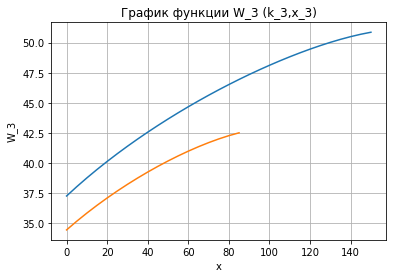

Значения k_3: [ 85.26  90.26  95.26 100.26 105.26 110.26 115.26 120.26 125.26 130.26
 135.26 140.26 145.26 150.26]
Значения x_3: [ 85  90  95 100 105 110 115 120 125 130 135 140 145 150]
Значения W_3: [42.50090902 43.16320845 43.81706866 44.46290401 45.10109455 45.73198988
 46.35591257 46.973161   47.58401193 48.18872262 48.78753274 49.38066609
 49.96833199 50.55072664]


2й этап:


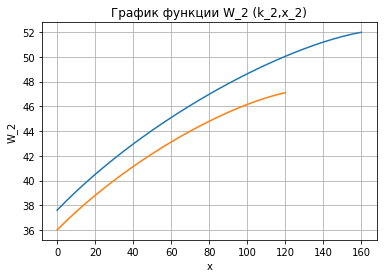

Значения k_2: [121.8 126.8 131.8 136.8 141.8 146.8 151.8 156.8 161.8]
Значения x_2: [120 125 130 135 140 145 150 155 160]
Значения W_2: [47.11140086 47.72225179 48.32696247 48.9257726  49.51890595 50.10657185
 50.6889665  51.26627408 51.83866781]


1й этап:


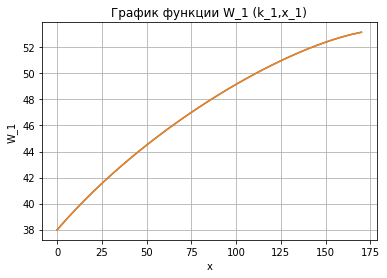

Значения k_1: 174
Значения x_1: [121 126 131 136 141 146 151 156 161 166 171]
Значения W_1: [50.70535905 51.03628923 51.35204404 51.65190889 51.93497513 52.20009065
 52.4457903  52.67019493 52.87086107 53.04454818 53.18684139]


In [75]:
#-*-coding: utf-8-*-
import matplotlib.pyplot as plt
import operator
import numpy as np
iteration = 0
start_k = 174
# Призводительность цеха 1
def f1(x):
    return (5+(x+40)**(2/3))

# Призводительность цеха 2
def f2(x):
    return (7+(x+30)**(1/2))

# Общая производительность за месяц
def w(k, x):
    return (f1(x)+f2(k-x))

# Остаток производства за месяц
def phi(k,x):
    return (0.7*x+0.94*(k-x))
# Главная функция 
def magic (k):
    global iteration;
    global best_x;
    iteration += 1;
    x_list = [i for i in range (int(k))];
    if (iteration<3):
        next_results_list=[w(k,i)+magic(phi(k,i)) for i in x_list]
    else:
        next_results_list = [w(k,i) for i in x_list]
    best_result=max(next_results_list)
    iteration -= 1
    best_x =next_results_list.index(best_result)
    return best_result

for i in range(3):
    result = magic(start_k)
    if(iteration==0):
           fullresult=int(result)
    iteration+=1
    
print("Total win: ",fullresult)
#Оптимальный выигрыш от управления
#3 этап
print("\n\n3й этап:")
k3_max_1=0.7**2*174;
k3_max_2=0.94**2*174;
k_3 = np.arange(k3_max_1,k3_max_2,5)
xs3_1 = np.arange(0,k3_max_1,5) #85
xs3_2 = np.arange(0,k3_max_2,5) #150
plt.plot(xs_2,w(k3_max_2,xs3_2),xs_1,w(k3_max_1,xs3_1));
plt.xlabel('x')
plt.ylabel('W_3')
plt.title('График функции W_3 (k_3,x_3)')
plt.grid(True)
plt.show()
print("Значения k_3:",k_3)
x_3 = np.arange(85,155,5)
print("Значения x_3:",x_3)
W_3 = w(k_3,x_3)
print("Значения W_3:",W_3)

#2 этап
print("\n\n2й этап:")
k2_max_1=0.7**1*174;
k2_max_2=0.94**1*174;
k_2 = np.arange(k2_max_1,k2_max_2,5)
xs2_1 = np.arange(0,k2_max_1,5) #120
xs2_2 = np.arange(0,k2_max_2,5) #165
plt.plot(xs2_2,w(k2_max_2,xs2_2),xs2_1,w(k2_max_1,xs2_1));
plt.xlabel('x')
plt.ylabel('W_2')
plt.title('График функции W_2 (k_2,x_2)')
plt.grid(True)
plt.show()
print("Значения k_2:",k_2)
x_2 = np.arange(120,165,5)
print("Значения x_2:",x_2)
W_2 = w(k_2,x_2)
print("Значения W_2:",W_2)

#1 этап
print("\n\n1й этап:")
k1_max_1=0.7**0*174;
k1_max_2=0.94**0*174;
k_1 = np.arange(k1_max_1,k1_max_2,5) #174=start_k
xs1_1 = np.arange(0,k1_max_1,5) #121
xs1_2 = np.arange(0,k1_max_2,5) #175
plt.plot(xs1_2,w(k1_max_2,xs1_2),xs1_1,w(k1_max_1,xs1_1));
plt.xlabel('x')
plt.ylabel('W_1')
plt.title('График функции W_1 (k_1,x_1)')
plt.grid(True)
plt.show()
k_1 = 174
print("Значения k_1:",k_1)
x_1 = np.arange(121,175,5)
print("Значения x_1:",x_1)
W_1 = w(k_1,x_1)
print("Значения W_1:",W_1)







Таким образом, можно сформулировать следующие рекомендации по оптимальному распределению средств. Из имеющегося в начале квартала запаса средств k=174 усл. ед. и остающихся средств в конце каждого месяца нужно вкладывать по месяцам в цеха I и II следующие суммы:  
Оптимальный план будет иметь вид:  

| Месяц                               | 1   | 2   | 3  |
|-------------------------------------|-----|-----|----|
| Средства, выделяемые на первом цехе | 171 | 140 | 120|
| Средства, выделяемые на втором цехе | 3   | 1   | 0  | 

При таком планировании будет получена максимальная производительность за месяц, равная 143 усл. ед.  
Определим остаток средств на конец квартала: 120* 0.7 + 0 * 0.94 = 84 усл. ед.